In [26]:
import numpy as np


def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

In [7]:
from google.colab import files
uploaded = files.upload()

Saving climbingdown_subject1.csv to climbingdown_subject1.csv
Saving climbingdown_subject2.csv to climbingdown_subject2.csv
Saving climbingdown_subject3.csv to climbingdown_subject3.csv
Saving climbingdown_subject4.csv to climbingdown_subject4.csv
Saving climbingdown_subject5.csv to climbingdown_subject5.csv
Saving climbingdown_subject6.csv to climbingdown_subject6.csv
Saving climbingdown_subject7.csv to climbingdown_subject7.csv
Saving climbingdown_subject8.csv to climbingdown_subject8.csv
Saving climbingdown_subject9.csv to climbingdown_subject9.csv
Saving climbingdown_subject10.csv to climbingdown_subject10.csv
Saving climbingdown_subject11.csv to climbingdown_subject11.csv
Saving climbingdown_subject12.csv to climbingdown_subject12.csv
Saving climbingdown_subject13.csv to climbingdown_subject13.csv
Saving climbingdown_subject14.csv to climbingdown_subject14.csv
Saving climbingdown_subject15.csv to climbingdown_subject15.csv
Saving climbingup_subject1.csv to climbingup_subject1.csv


## Loading libraries

In [8]:
import seaborn as sns
import pandas as pd

## Reading and accessing data


In [24]:
# Global variable for accessing, reading and loading data
# Types of csv files
TYPES_OF_DATA = ["walking","running","climbingup","climbingdown"]

> Below snippet of code
 reads the data dynamically using a loop.



In [9]:


# Reading all files and storing in memory dynamically
for d_type in TYPES_OF_DATA:
  for i in range(1,16):
    globals()[f"df_{d_type}_subject{i}"] = pd.read_csv(f"{d_type}_subject{i}.csv")

##  Sample snippet of data with plots

> Please note data has been read dynamically , and is stored in data frame with the following naming convention `df_walking_subject1` , `df_standing_subject3` etc.



In [11]:
df_climbingdown_subject1.head()

,id,attr_time,attr_x,attr_y,attr_z
0,1,1435996968010,5.616797,8.064270,0.878073
1,2,1435996968032,5.589264,8.054693,0.869095
2,3,1435996968052,5.580884,8.060080,0.908001
3,4,1435996968073,5.588067,8.033744,0.884658
4,5,1435996968093,5.583877,8.060678,0.875679


In [13]:
df_running_subject13.head()

,id,attr_time,attr_x,attr_y,attr_z
0,1,1436982010002,0.269348,9.476251,-2.221221
1,2,1436982010022,0.227449,9.453505,-2.287660
2,3,1436982010042,0.235829,9.454702,-2.228403
3,4,1436982010063,0.251990,9.449914,-2.202666
4,5,1436982010111,0.263961,9.441534,-2.237980


> This is what the time series looks as a plot **for a few sample points**

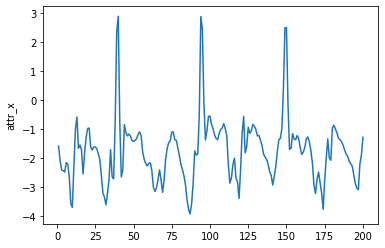

In [15]:

sns.lineplot(x=range(1, len(df_walking_subject1['attr_x'][2000:2200])+1), y=df_walking_subject1['attr_x'][1000:1200])

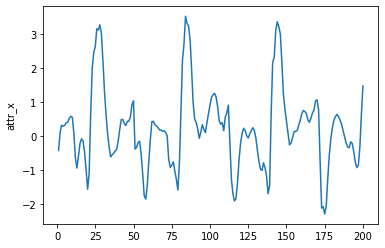

In [17]:
sns.lineplot(x=range(1, len(df_walking_subject3['attr_x'][2000:2200])+1), y=df_walking_subject3['attr_x'][1000:1200])

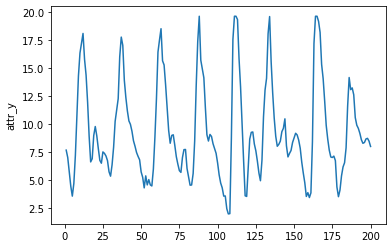

In [19]:
sns.lineplot(x=range(1, len(df_climbingdown_subject10['attr_y'][2000:2200])+1), y=df_climbingdown_subject10['attr_y'][1000:1200])

## Calculating entropy and complexity, while varying embedding dimensions, delay and signal length


In [32]:
# Different value of delay
DELAYS = [1,2,3]

# Different values of embedding dimensions
EMBEDDED_DIMENSIONS = [3,4,5,6]


 
 
 Below is a slightly complicated cell which **calculates permutation entropy and complexity, for each of the 15 subjects**  (loaded dynamically earlier).

 


> **It varies delays, embedded dimensions, signal length and attribute x,y,z for the various datasets of the 15 subjects, storing the calculated data in the form of a dictionary.**

In [27]:

# Types of calculations to perform on the data
TYPES_OF_CALCULATIONS = ["p_entropy","complexity"]

# Different value of delay
DELAYS = [1,2,3]

# Different values of embedding dimensions
EMBEDDED_DIMENSIONS = [3,4,5,6]

# Different signal length values
SIGNAL_LENGTHS = [1024, 2048, 4096]

# Generating empty dictionaries to store all the data
for i in range(1,16):
  for calc_type in TYPES_OF_CALCULATIONS:
    for d_type in TYPES_OF_DATA:
       
       # Dataframe name that will be used to access and calculate data
       df_name = f"df_{d_type}_subject{i}"

       # Variable which contains the dataframe values
       current_df = globals()[df_name]

       # Dictionary name that will store data for subject i, 
       # datatype ("walking","running","climbingup","climbingdown"),
       # calculation type ("entropy","complexity")
       dict_name = f"subject{i}_{d_type}_{calc_type}"

       # Assign an empty dictionary
       globals()[dict_name] = {}
       
       # Vary attribute, delay, dimension and signal length
       # Take each attribute of the data
       for att_type in ["attr_x","attr_y","attr_z"]:
         for delay in DELAYS:
           for dim in EMBEDDED_DIMENSIONS:
             for signal_length in SIGNAL_LENGTHS:
               
               # Calculating ordinal pattern
               op_val = ordinal_patterns(current_df[att_type][1:1+signal_length],dim,delay)

               
               # Assign the dictionary created above 
               # with a tuple of attribute type (x,y,z)
               # Delay, dimension and signal length with calculation of 
               # entropy or complexity

               globals()[dict_name][(att_type,delay,dim,signal_length)] = globals()[calc_type](op_val)







## Showing sample values calculated

> Below dictionary shows all the values for **subject 1**, **climbing down** calculated by ***varying***: **attributes x,y,z** of the data , **delay** , **embedded dimension** and **signal length** (1-1024,1-2048,1-4096) etc

In [28]:
subject1_climbingdown_complexity

{('attr_x', 1, 3, 1024): 0.11378874032390125,
 ('attr_x', 1, 3, 2048): 0.1468651713429678,
 ('attr_x', 1, 3, 4096): 0.15800942787267713,
 ('attr_x', 1, 4, 1024): 0.18816261252349098,
 ('attr_x', 1, 4, 2048): 0.22517433824977515,
 ('attr_x', 1, 4, 4096): 0.24106790111838725,
 ('attr_x', 1, 5, 1024): 0.23193358458949456,
 ('attr_x', 1, 5, 2048): 0.27768124105608655,
 ('attr_x', 1, 5, 4096): 0.3004881278202784,
 ('attr_x', 1, 6, 1024): 0.19760910163044682,
 ('attr_x', 1, 6, 2048): 0.2654903954104116,
 ('attr_x', 1, 6, 4096): 0.3047184457645952,
 ('attr_x', 2, 3, 1024): 0.03602064996364937,
 ('attr_x', 2, 3, 2048): 0.0604136437635628,
 ('attr_x', 2, 3, 4096): 0.06486099722343558,
 ('attr_x', 2, 4, 1024): 0.07374918068567432,
 ('attr_x', 2, 4, 2048): 0.11401429221715592,
 ('attr_x', 2, 4, 4096): 0.12869570270603017,
 ('attr_x', 2, 5, 1024): 0.1303871842135447,
 ('attr_x', 2, 5, 2048): 0.17570978239711907,
 ('attr_x', 2, 5, 4096): 0.19790520568320832,
 ('attr_x', 2, 6, 1024): 0.1093917844215

> For eg, For **subject 5** , **running data** , **"attribute y"**, **delay-1**, **dimension-3** and **signal length of 2048** : 

* **Complexity data** can be accessed as `subject5_running_complexity[("attr_y",1,3,2048)]`

In [29]:
subject5_running_complexity[("attr_y",1,3,2048)]

0.16713643784707383

* **Permutation entropy** can be accessed as : `subject5_running_p_entropy[("attr_y",1,3,2048)]`


In [31]:
subject5_running_p_entropy[("attr_y",1,3,2048)]

0.7619125341505947

In [ ]:
i = 0
D = 3
T = 1
while i < 31000:
  op_walking = ordinal_patterns(walking['attr_x'][i:i+1000],D,T)
  op_standing = ordinal_patterns(standing['attr_x'][i:i+1000],D,T)
  walking_entropy[str(i) +"-"+ str(i+1000)] = p_entropy(op_walking)
  walking_complexity[str(i) +"-"+ str(i+1000)] = complexity(op_walking)
  standing_entropy[str(i) +"-"+ str(i+1000)] = p_entropy(op_standing)
  standing_complexity[str(i) +"-"+ str(i+1000)] = complexity(op_standing)

  i += 1000

# These values can be used for machine learning algorithms
sns.scatterplot(x=walking_entropy.keys() ,y=walking_entropy.values(),legend="auto")
sns.scatterplot(x=walking_complexity.keys() ,y=walking_complexity.values(),legend="auto")

sns.scatterplot(x=standing_entropy.keys() ,y=standing_entropy.values(), legend="auto")
sns.scatterplot(x=standing_complexity.keys() ,y=standing_complexity.values(), legend="auto")


walking_entropy.values()
# walking_complexity


# standing_entropy
# standing_complexity



In [ ]:
op_walking = ordinal_patterns(walking['attr_x'][1000:1200],3,1)
op_standing = ordinal_patterns(standing['attr_x'][1000:1200],3,1)
print(op_walking)
print(op_standing)
print("Permutation Entropy Walking=", p_entropy(op_walking))
print("Complexity Walking=", complexity(op_walking))
print("Permutation Entropy Standing=", p_entropy(op_standing))
print("Complexity Standing=", complexity(op_standing))

# By plotting different values of entropies and complexity for different users
# We can get properly classified records in 2d plane

[84, 17, 15, 15, 12, 55]
[52, 24, 20, 31, 27, 44]
Permutation Entropy Walking= 0.8322611145502673
Complexity Walking= 0.1337895020445875
Permutation Entropy Standing= 0.968177388382445
Complexity Standing= 0.030087523406666223
